In [35]:
!pip install folium


import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [5]:
df = pd.read_excel("C:\\Users\\lenovo\\Downloads\\Real estate valuation data set.xlsx")
df.set_index("No", inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11496\3738583123.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


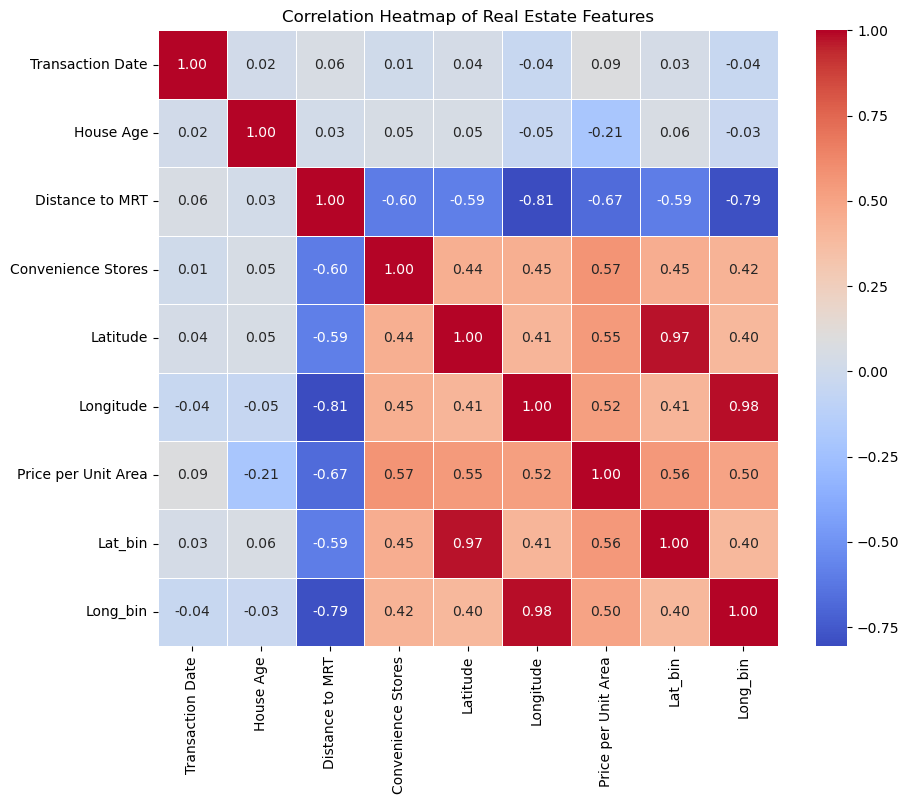

In [19]:
#"Is there a correlation among the various features (age, MRT distance, convenience stores, etc.) in predicting property price?"


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Real Estate Features")

# Display the plot
plt.show();

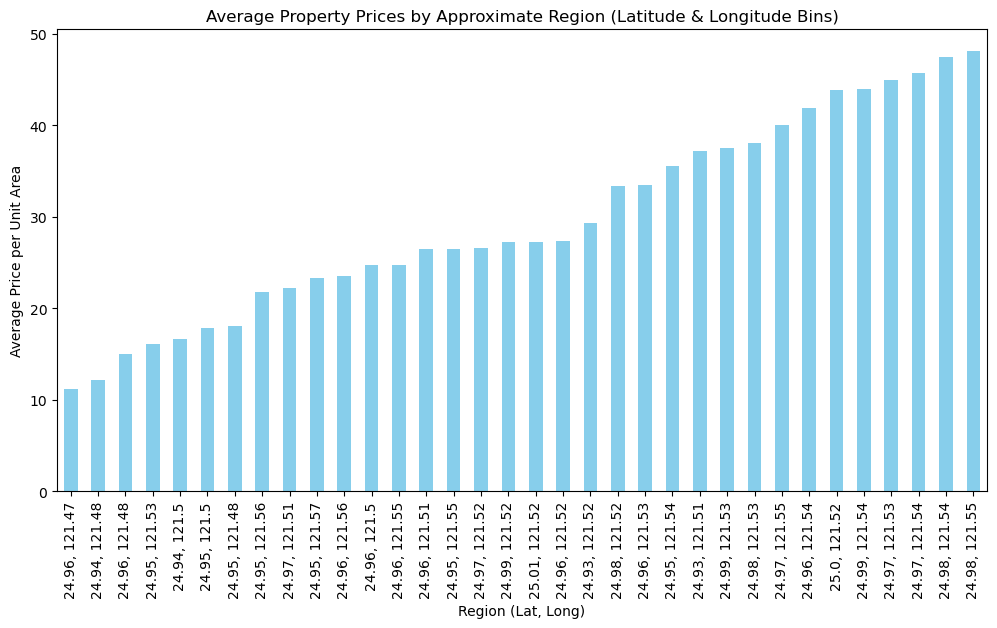

In [15]:
#"How do average property prices vary across different regions?"

df.columns = ["Transaction Date", "House Age", "Distance to MRT", "Convenience Stores", "Latitude", "Longitude", "Price per Unit Area"]

# Create latitude and longitude bins (adjust rounding as needed)
df["Lat_bin"] = df["Latitude"].round(2)  # Adjust rounding for desired region size
df["Long_bin"] = df["Longitude"].round(2)

# Combine latitude and longitude bins to create unique region identifiers
df["Region"] = df["Lat_bin"].astype(str) + ", " + df["Long_bin"].astype(str)

# Calculate the average price per 'Region'
region_prices = df.groupby("Region")["Price per Unit Area"].mean().sort_values()

# Plotting the bar chart of average prices by pseudo-region
plt.figure(figsize=(12, 6))
region_prices.plot(kind="bar", color="skyblue")

# Adding title and labels
plt.title("Average Property Prices by Approximate Region (Latitude & Longitude Bins)")
plt.xlabel("Region (Lat, Long)")
plt.ylabel("Average Price per Unit Area")
plt.xticks(rotation=90)
plt.show()

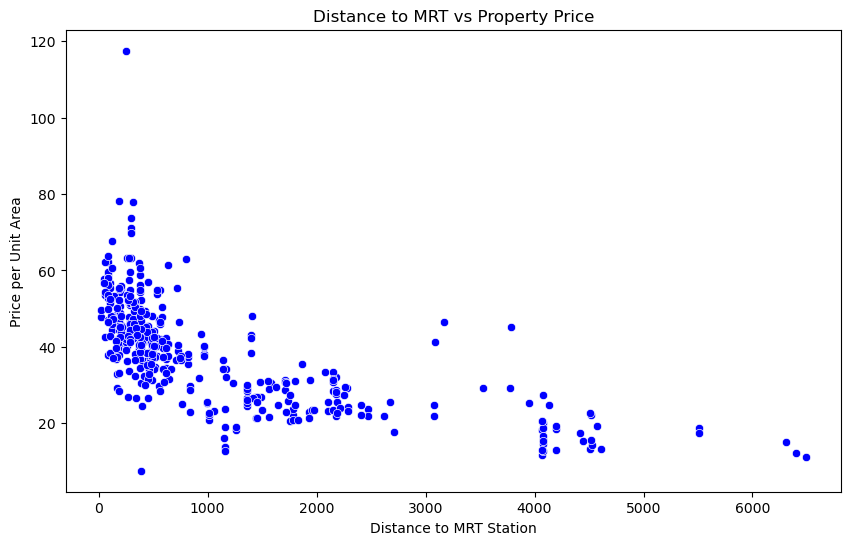

In [21]:
#How does distance to the MRT station affect property prices?

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Distance to MRT", y="Price per Unit Area", data=df, color='blue')

# Adding title and labels
plt.title("Distance to MRT vs Property Price")
plt.xlabel("Distance to MRT Station")
plt.ylabel("Price per Unit Area")
plt.show();


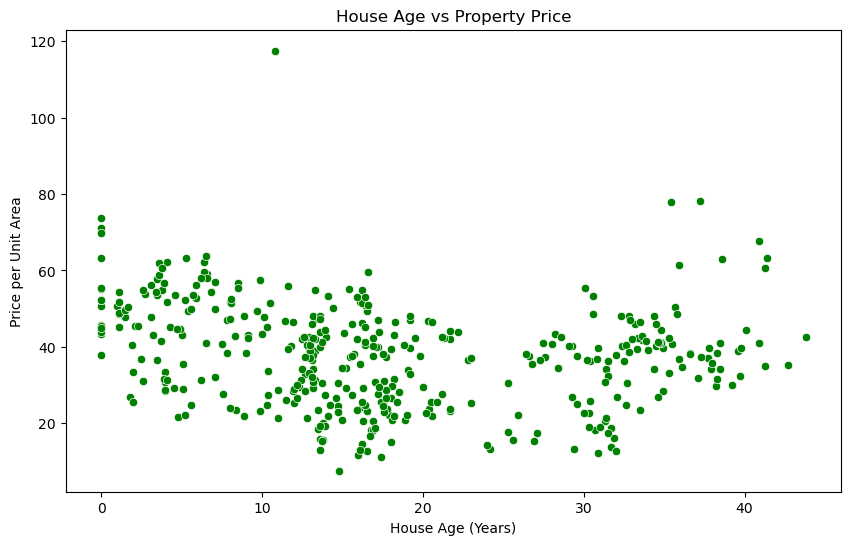

In [22]:
#What is the relationship between house age and property price?

plt.figure(figsize=(10, 6))
sns.scatterplot(x="House Age", y="Price per Unit Area", data=df, color='green')

# Adding title and labels
plt.title("House Age vs Property Price")
plt.xlabel("House Age (Years)")
plt.ylabel("Price per Unit Area")
plt.show();


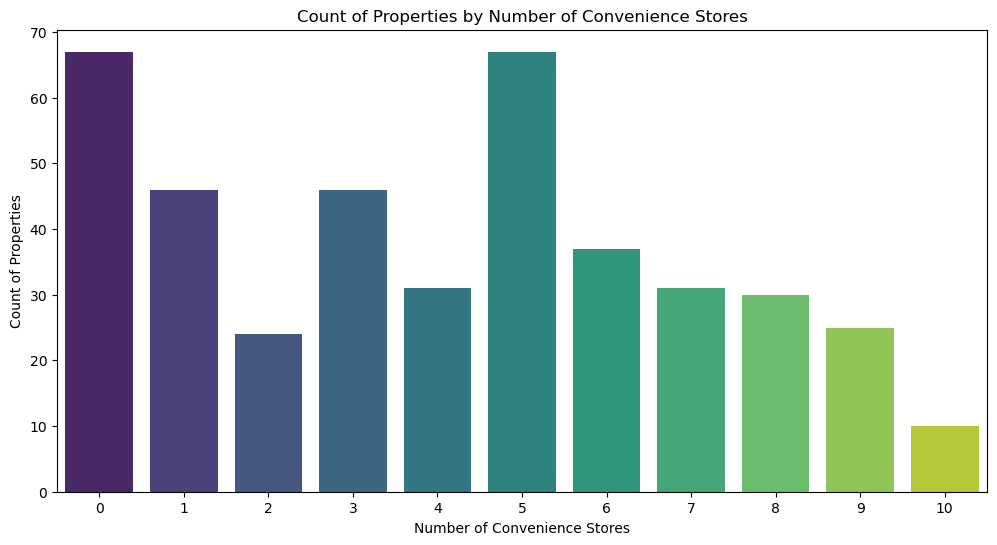

In [30]:
#count of properties

# Calculate counts of convenience stores
df_counts = df["Convenience Stores"].value_counts()

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plotting the countplot
sns.countplot(x="Convenience Stores", data=df, palette="viridis")

# Adding title and labels
plt.title("Count of Properties by Number of Convenience Stores")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Count of Properties")
plt.xticks(rotation=0)

# Show the plot
plt.show();


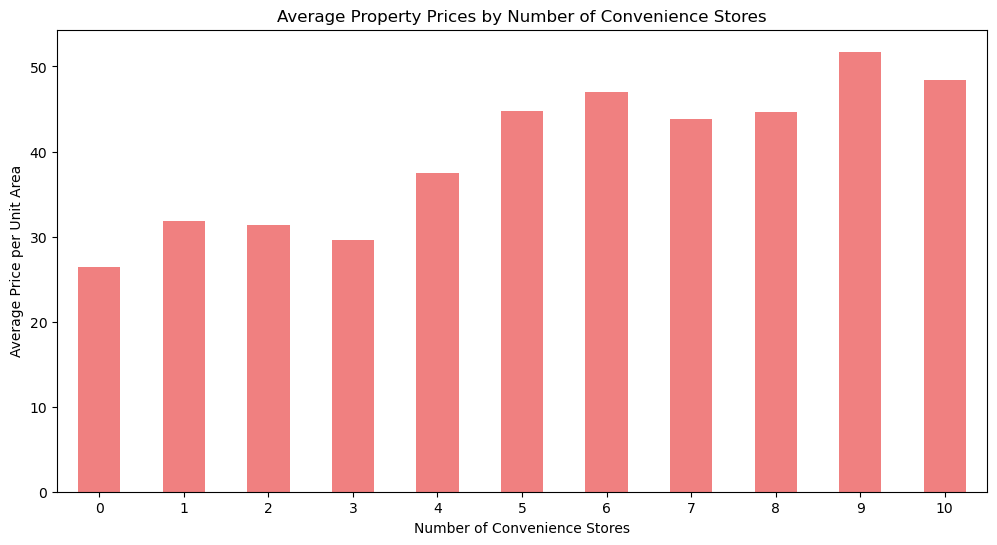

In [24]:
#What is the average property price based on the number of convenience stores nearby?

# Calculate the average price per number of convenience stores
avg_price_stores = df.groupby("Convenience Stores")["Price per Unit Area"].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
avg_price_stores.plot(kind="bar", color="lightcoral")

# Adding title and labels
plt.title("Average Property Prices by Number of Convenience Stores")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Average Price per Unit Area")
plt.xticks(rotation=0)
plt.show()


In [36]:
#How do average property prices vary geographically across different locations in the dataset?"

# Calculate the average price per latitude and longitude
avg_price_map = df.groupby(['Latitude', 'Longitude'])['Price per Unit Area'].mean().reset_index()

# Create a base map
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add markers to the map
marker_cluster = MarkerCluster().add_to(m)

for idx, row in avg_price_map.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Price per Unit Area'] / 1000,  # Adjust radius for better visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Avg Price: {row["Price per Unit Area"]:.2f}'
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('average_property_prices_map.html')

# To display the map in a Jupyter notebook (if applicable)
m